In [2]:
%matplotlib inline
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [3]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.optimizers import SGD
from keras import models
from keras import layers
from keras import regularizers

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

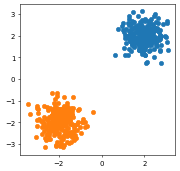

In [6]:
n=250
x1=np.random.normal(2,0.5, n)
x2=np.random.normal(2,0.5, n)
y=np.ones(n)

plt.figure(figsize=(4, 4), dpi=50)
plt.scatter(x1,x2)

x11=np.random.normal(-2,0.5, n)
x22=np.random.normal(-2,0.5, n)

yy=np.zeros(n)

plt.scatter(x11,x22)

In [7]:
x1=np.concatenate([x1,x11],axis=0)
x2=np.concatenate([x2,x22],axis=0)
y=np.concatenate([y,yy],axis=0)
X=np.stack([x1,x2],1)#.reshape(-1,2)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
model = models.Sequential()
model.add(layers.Dense(3, activation='tanh', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=500,
    verbose=0)

In [11]:
results = model.evaluate(X_test, y_test)
results

6/6 [==============================] - 0s 990us/step - loss: 8.7603e-09 - accuracy: 1.0000


[8.760332015356198e-09, 1.0]

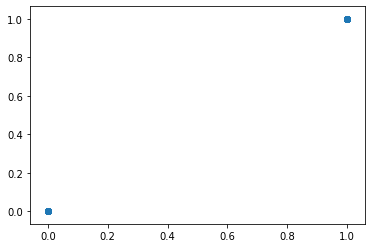

In [12]:
reg=model.predict(X_train,batch_size=10)
plt.scatter(reg,y_train)

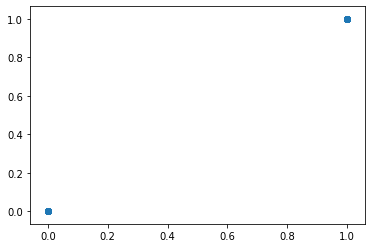

In [13]:
reg=model.predict(X_test,batch_size=10)
plt.scatter(reg,y_test)